In [0]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Important Instructions

### 1. Copy the dataset to your Google Drive
### 2. Mount Google Drive to this notebook
### 3. Find the path to the dataset and paste it in the variable path

# Add path to file

In [0]:
path = '/content/drive/My Drive/IntroToNLP/1429_1.csv'

## Check if file exists

In [167]:
import os
os.path.exists(path)

True

## Read the dataset

In [168]:
review_data = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Quickly take a peek at the dataset

In [56]:
review_data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## What are the columns in the dataframe?

In [57]:
review_data.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

## Select the review and the rating

In [0]:
data = review_data[['reviews.text','reviews.rating']]

## Take a quick peek at the modified dataframe

In [59]:
data.tail()

,reviews.text,reviews.rating
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0
34659,to spite the fact that i have nothing but good...,1.0


## Check for null values

In [0]:
null_text = data[data['reviews.text'].isnull()]

In [61]:
null_text

,reviews.text,reviews.rating
3111,NaN,5.0


In [0]:
null_rating = data[data['reviews.rating'].isnull()]

In [63]:
null_rating

,reviews.text,reviews.rating
2886,The Kindle is my first e-ink reader. I own an ...,NaN
2887,"I'm a first-time Kindle owner, so I have nothi...",NaN
2888,UPDATE NOVEMBER 2011:My review is now over a y...,NaN
2889,"I'm a first-time Kindle owner, so I have nothi...",NaN
2890,I woke up to a nice surprise this morning: a n...,NaN
2891,The Kindle is my first e-ink reader. I own an ...,NaN
2892,UPDATE NOVEMBER 2011:br /br /My review is now ...,NaN
2893,I woke up to a nice surprise this morning: a n...,NaN
2894,I use to hate to read but now that I have my K...,NaN
2895,All of them quit working. There's absolutely n...,NaN


## Handle Null values

In [0]:
data = data.dropna()

In [0]:
data = data[(data['reviews.rating'] < 4) | (data['reviews.rating'] == 5)].reset_index()

## Check the distribution of data

In [0]:
count = data['reviews.rating'].value_counts()

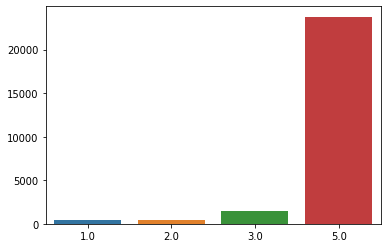

In [69]:
x = list(count.index)
y = list(count.values)
sns.barplot(x,y)

## Percentage of positive review

In [70]:
print("Percentage of positive reiview is {}".format((count[5.0]/count.sum())*100))

Percentage of positive reiview is 91.140502204332


# Preprocess text

1. Tokenize the sentence
2. Remove words like 'is','be','a'
3. Remove punctuation like ',' ,'@'
4. Convert words to lowercase

In [0]:
sample = data['reviews.text'][0]

In [72]:
print(sample)

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.


# Natural Language Toolkit (Nltk)

In [172]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Tokenizing

In [0]:
from nltk.tokenize import word_tokenize

In [0]:
sample = word_tokenize(sample)

In [76]:
print(sample)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed', '.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease', '.']


## Removing stop words

In [0]:
from nltk.corpus import stopwords

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))

## What are the stop words?

In [80]:
print(stop_words)

{'mustn', "weren't", 'having', 'when', 'such', 'it', 'an', 'haven', 'shouldn', 'she', 'they', "shan't", 'his', 'because', 'all', 'some', 'being', 'each', 'which', 'too', 'himself', 'were', 'very', 'now', 'that', "that'll", 'be', 'will', 'a', 'both', 'then', 'll', 'during', 'theirs', 'needn', 't', 'not', 'had', 'no', 'itself', 'yourselves', 've', 's', 'your', 'd', 'weren', "mustn't", 'y', 'this', "hasn't", 'those', 'have', 'yourself', 'here', 'off', 'before', 'the', 'has', 'hers', 'does', 'under', 'isn', 'in', 'while', "isn't", 'my', 'until', 'on', 'don', "aren't", 'was', 'so', 'didn', 'me', 'is', "don't", 'themselves', "couldn't", 'but', 'most', "should've", 'do', 'whom', 'did', "you'd", 'are', 'above', 'there', 'few', 'our', 'aren', "needn't", 'you', 'yours', 'as', 'nor', "wouldn't", 'should', 'what', 'about', 'we', 'to', 'hasn', "it's", 'more', 'down', 'into', "shouldn't", 'once', 'their', 'her', 'who', 'between', 'own', 'doing', 'them', "hadn't", 'won', "you've", 'with', 'at', 'afte

## Use a for loop

In [0]:
output = []
for word in sample:
  if word not in stop_words:
    output.append(word)

In [82]:
print(output)

['This', 'product', 'far', 'disappointed', '.', 'My', 'children', 'love', 'use', 'I', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease', '.']


## Use list comprehension

In [0]:
sample = [word for word  in sample if word.lower() not in stop_words]

# Remove punctuations

In [0]:
import string

In [85]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## How to use it

In [86]:
',' in string.punctuation

True

In [0]:
sample = [word for word in sample if word not in string.punctuation]

In [88]:
print(sample)

['product', 'far', 'disappointed', 'children', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease']


# Stemming the words

In [0]:
from nltk.stem import PorterStemmer

In [0]:
stemmer = PorterStemmer()

In [0]:
output = []
for word in sample:
  output.append(stemmer.stem(word))

In [92]:
print(output)

['product', 'far', 'disappoint', 'children', 'love', 'use', 'like', 'abil', 'monitor', 'control', 'content', 'see', 'eas']


# Lemmatizing the words

In [0]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [0]:
output = []
for word in sample:
  output.append(lemmatizer.lemmatize(word))

In [175]:
print(output)

['product', 'far', 'disappointed', 'child', 'love', 'use', 'like', 'ability', 'monitor', 'control', 'content', 'see', 'ease']


# Combine the functions together

In [0]:
def preprocess(sentence):
  tokens = word_tokenize(sentence)
  tokens = [word.lower() for word in tokens if word not in stop_words]
  tokens = [word for word in tokens if word not in string.punctuation]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  tokens = [word for word in tokens if len(word)>1]
  return " ".join(tokens)

In [0]:
def convert_rating(rating):
  if rating == 5.0:
    return 1
  else:
    return 0

# Preprocessing the text in dataset

In [0]:
X = data['reviews.text'].map(preprocess)
y = data['reviews.rating'].map(convert_rating)

# Visualize the words used in the reviews

In [0]:
from wordcloud import WordCloud

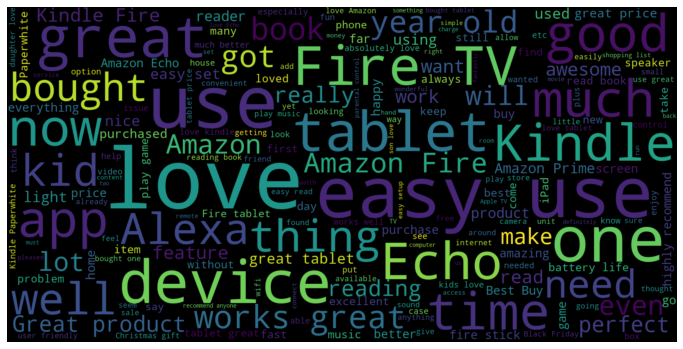

In [97]:
pos_text = data[data['reviews.rating']==5.0]['reviews.text']
pos_text = ' '.join(pos_text)
cloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

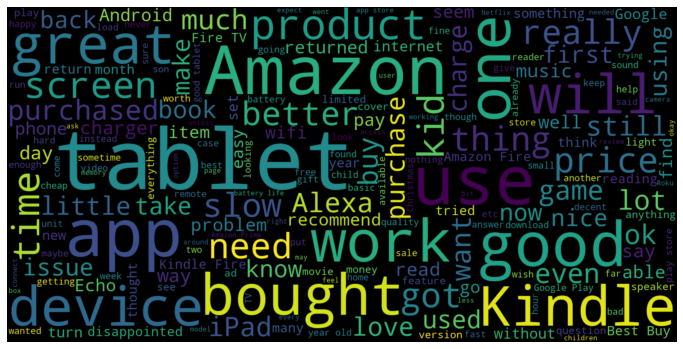

In [98]:
neg_text = data[data['reviews.rating'] < 4]['reviews.text']
neg_text = ' '.join(neg_text)
cloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Using Word Vectors and Sequence Models

In [0]:
X = data['reviews.text']

In [0]:
X = X.map(preprocess)

## Tokenize the review text

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
tokenizer = Tokenizer()

In [0]:
tokenizer.fit_on_texts(X)

In [0]:
sequence_dict = tokenizer.word_index

In [184]:
sequence_dict

{'great': 1,
 'love': 2,
 'tablet': 3,
 'use': 4,
 'it': 5,
 'easy': 6,
 'the': 7,
 'amazon': 8,
 'kindle': 9,
 'one': 10,
 'bought': 11,
 'this': 12,
 'fire': 13,
 'good': 14,
 'work': 15,
 'product': 16,
 'price': 17,
 'like': 18,
 'tv': 19,
 'book': 20,
 'would': 21,
 'get': 22,
 'echo': 23,
 'read': 24,
 'device': 25,
 'much': 26,
 'kid': 27,
 'music': 28,
 'alexa': 29,
 'best': 30,
 'time': 31,
 'reading': 32,
 'my': 33,
 'play': 34,
 'buy': 35,
 'well': 36,
 'game': 37,
 'really': 38,
 'gift': 39,
 'apps': 40,
 'light': 41,
 'purchased': 42,
 'year': 43,
 'also': 44,
 'old': 45,
 'recommend': 46,
 'got': 47,
 'screen': 48,
 'we': 49,
 'better': 50,
 'thing': 51,
 'set': 52,
 'lot': 53,
 'need': 54,
 'perfect': 55,
 'she': 56,
 'new': 57,
 'purchase': 58,
 'home': 59,
 'even': 60,
 'very': 61,
 'make': 62,
 'quality': 63,
 'movie': 64,
 'christmas': 65,
 'want': 66,
 'nice': 67,
 'using': 68,
 'sound': 69,
 'prime': 70,
 'feature': 71,
 'could': 72,
 'little': 73,
 'size': 74,
 'g

In [0]:
word_dict = dict((num,val) for (val, num) in sequence_dict.items())

In [186]:
print("The number of words in dictionary is {}".format(len(word_dict)))

The number of words in dictionary is 10137


## Generate sequences from reviews text

In [0]:
sequences  = np.array(tokenizer.texts_to_sequences(X))

## What are these sequences

In [188]:
sequences[2]

[462, 3, 4, 353, 751, 1840, 120, 907, 353, 1670, 220]

In [189]:
' '.join(word_dict[index] for index in sequences[2])

'inexpensive tablet use learn step nabi he thrilled learn skype already'

## Get the input ready

In [0]:
X = tf.keras.preprocessing.sequence.pad_sequences(sequences, 10, truncating='post')

## Get train and test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, shuffle=True)

# Build a sequence model

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Embedding(len(word_dict)+1, 10, input_length=10))

In [0]:
model.add(tf.keras.layers.LSTM(150, return_sequences=True))
model.add(tf.keras.layers.LSTM(150, return_sequences=False))

In [0]:
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [197]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 10)            101380    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 150)           96600     
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 393,781
Trainable params: 393,781
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=0.0001)

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model

In [200]:
model.fit(X_train, y_train, batch_size=16, epochs=2)

Epoch 1/2
1468/1468 [==============================] - 44s 30ms/step - loss: 0.2905 - accuracy: 0.9107
Epoch 2/2
1468/1468 [==============================] - 44s 30ms/step - loss: 0.2216 - accuracy: 0.9200


# Test the model

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
accuracy = accuracy_score(y_test, y_pred)

In [203]:
print("The accuracy of the model is : {}".format(accuracy))

The accuracy of the model is : 0.9172096588731314


# Analyze the performance

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cmatrix = confusion_matrix(y_test, y_pred)

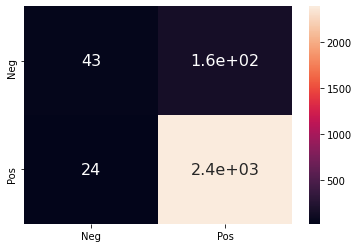

In [153]:
sns.heatmap(cmatrix,annot=True,annot_kws={"size": 16},xticklabels=['Neg','Pos'], yticklabels=['Neg', 'Pos'])
plt.show()

In [0]:
pos_recall = (cmatrix[1][1]/cmatrix[1].sum())

In [155]:
print("The recall for positive reviews is {}".format(pos_recall))

The recall for positive reviews is 0.9900414937759336


In [0]:
neg_recall = (cmatrix[0][0]/cmatrix[0].sum())

In [159]:
print("The recall for negative reviews is {}".format(neg_recall))

The recall for negative reviews is 0.21608040201005024


## Calculate the precision

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [0]:
pos_precision = precision_score(y_test, y_pred)

In [162]:
print("The precision for positive review is {}".format(pos_precision))

The precision for positive review is 0.9386309992132179


In [0]:
neg_precision = precision_score(y_test, y_pred, pos_label=0)

In [164]:
print("The precision for negative review is {}".format(neg_precision))

The precision for negative review is 0.6417910447761194
